# Identifying Precise Forecasters on r/Wallstreetbets
**BrainStation Data Science Bootcamp - Capstone Project**

**Author: L Gavrilova**

**Date: 15 October 2023**

# Notebook 1 - Data Cleaning and EDA - DRAFT

## Table of Contents

1. [Introduction](#1.-Introduction)
    - Objective of project
    - What potential business value does this project bring?
    - How will this project help/have an impact <br>
    
2. [Data Collection](#2.-Data-Collection)
    - Source of the data
    - Data dictionary <br>
    
3. [Data Wrangling](#3.-Data-Wrangling)
    - Load the data
    - Data Cleaning
        - [Duplicates removal](### Duplicates removal) <br>
        
4. [EDA](#4.-EDA)
    - Data Distribution <br>
    Univariate Analsys
    Bivariate analysis

    
5. [Conclusion](#5.-Conclusion)

## 1. Introduction

### Objective of project:

I want to explore whether ML and NLP techniques can be used to ease the task of identifying and ranking “smart” social media accounts (the “Precise Forecasters”).  


### What potential business value does this project bring?

This project aims to augment decision-making process for various investors, especially small retail investors that dont have access to AI tools used by larger funds. There is a lot of noise on social networks, but there are also some very smart people sharing there ideas, and if we can separate noise from signal that would be extremely helpful. 

### How will this project help/have an impact:

- Help to identify “smart money” and “dumb money”
- Can be used to build a real-time trading strategy 
- This project has a potential to influence a multi-trillion-dollar capital markets and make them more efficient in allocating capital, making society more prosperous.
 

---
## 2. Data Collection

#### Source of the data

https://www.kaggle.com/datasets/leukipp/reddit-finance-data

I chose this dataset as it contains the field 'author', many other datasets focused on r/Wallstreetbets have that column removed.  The data covers period between Jan to Dec 2021. 

Instructions on downloading the dataset from kaggle:

1. Unzip the file.
2. There is one common folder named. It contains 14 subfolders, one for each subreddit. 
3. Each subfolder is named according to the subreddit it represents. Each subfolder contains two files.
4. Collect all .cvs files in one directory and concatenate them vertically. A new column is added in the process with the name of the subreddit. 

#### Data dictionary  


| Column Name            |   Data Type        |  Description                     |
|:----------------------:|:------------------:|----------------------------------|
|           id          |              string             |      The id of the submission        |
|    author   | (string)   | The redditors username  |
|    created   | (datetime)  |  Time the submission was created.
|    retrieved  |  (datetime  |  Time the submission was retrieved. |
|    edited  |  (datetime)  | Time the submission was modified. |
|    pinned   | (integer)  |  Whether or not the submission is pinned. |
|    archived   | (integer)  |  Whether or not the submission is archived.
|    locked   | (integer)  |  Whether or not the submission is locked.
|    removed  |  (integer)  |  Whether or not the submission is mod removed.
|    deleted  |  (integer)  |  Whether or not the submission is user deleted.
|    is_self   | (integer)  |  Whether or not the submission is a text.
|    is_video  |  (integer)  |  Whether or not the submission is a video.
|    is_original_content   | (integer)  |  Whether or not the submission has been set as original content.
|    title   | (string)  |  The title of the submission.
|    link_flair_text   | (string)  |  The submission link flairs text content.
|    upvote_ratio   | (number)  |  The percentage of upvotes from all votes on the submission.
|    score   | (integer)  |    The number of upvotes for the submission. |
|    gilded   | (integer)  |  The number of gilded awards on the submission.
|    total_awards_received  |  (integer)  |  The number of awards on the submission.
|    num_comments   | (integer)  |  The number of comments on the submission.
|    num_crossposts   | (integer)  |  The number of crossposts on the submission.
|    selftext   | (string)  |  The submission selftext on text posts.
|    thumbnail   |  (string)  |  The submission thumbnail on image posts.
|    shortlink    | (string)  |  The submission short url.

---
## 3 - Data Wrangling

In [1]:
# Importing several libraries
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6.0, 4.0) #setting figure size
import seaborn as sns
import matplotlib.dates as mdates
import os
import emoji
import re

In [2]:
DATAFILE = '../data/merged_data.csv'

In [3]:
df = pd.read_csv(DATAFILE)

/var/folders/j6/lnskfknd3zz28plgqdh6w_4m0000gn/T/ipykernel_8170/2709059952.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATAFILE)


In [7]:
# determine the shape of the database:
df.shape

(1500797, 25)

In [8]:
df.head(1).T

,0
id,ko4pii
author,[deleted]
created,2021-01-01 04:08:51
retrieved,2021-02-28 16:51:20
edited,1970-01-01 00:00:00
pinned,0
archived,0
locked,0
removed,1
deleted,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500797 entries, 0 to 1500796
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id                     1500797 non-null  object 
 1   author                 1500797 non-null  object 
 2   created                1500797 non-null  object 
 3   retrieved              1500797 non-null  object 
 4   edited                 1500797 non-null  object 
 5   pinned                 1500797 non-null  int64  
 6   archived               1500797 non-null  int64  
 7   locked                 1500797 non-null  int64  
 8   removed                1500797 non-null  int64  
 9   deleted                1500797 non-null  int64  
 10  is_self                1500797 non-null  int64  
 11  is_video               1500797 non-null  int64  
 12  is_original_content    1500797 non-null  int64  
 13  title                  1500792 non-null  object 
 14  link_flair_text   

All columns have the expected datatype, other than the date ('created'), so I will convert it into the datetime format:

In [10]:
# Convert the date column from 'object' datatype into a 'datetime' datatype:
df['created'] = pd.to_datetime(df['created'])

In [11]:
# I also convert 'title' and 'selftext' into strings:
df['title'] = df['title'].astype(str)
df['selftext'] = df['selftext'].astype(str)

In [12]:
# Drop columns that have no interest for my analysis
columns_to_drop = ['is_original_content', 'thumbnail', 'retrieved', 'edited', 'archived', 'locked']
df = df.drop(columns=columns_to_drop)

In [14]:
# Value counts for all categorical fields:
print("\nValue counts for categorical fields:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {column}:")
    print(df[column].value_counts())


Value counts for categorical fields:

Value counts for id:
id
ko4pii    1
ljh86e    1
ljh6zj    1
ljh6ww    1
ljh6t7    1
         ..
p0nzul    1
p0n40f    1
p0mgte    1
p0krvm    1
rt6lul    1
Name: count, Length: 1500797, dtype: int64

Value counts for author:
author
[deleted]              218784
AutoModerator            2581
fintechinshorts          1090
Onboarding92              785
nmstanley32               642
                        ...  
Delicious-Dog7349           1
Semi-proletariat            1
TheBuilder16                1
Qwal77                      1
coyote_of_the_month         1
Name: count, Length: 596401, dtype: int64

Value counts for title:
title
AMC                                                                               1444
GME                                                                                923
Dogecoin                                                                           671
SNDL                                                             

Observations:

In [15]:
# Describe the numerical fields
df.describe().T.style.background_gradient(cmap='BuGn')

,count,mean,min,25%,50%,75%,max,std
created,1500797,2021-04-26 16:23:55.459887616,2021-01-01 00:02:06,2021-01-30 15:48:55,2021-03-17 14:36:21,2021-06-29 02:32:34,2021-12-31 23:59:44,nan
pinned,1500797.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
removed,1500797.000000,0.671520,0.000000,0.000000,1.000000,1.000000,1.000000,0.469661
deleted,1500797.000000,0.093035,0.000000,0.000000,0.000000,0.000000,1.000000,0.290481
is_self,1500797.000000,0.635847,0.000000,0.000000,1.000000,1.000000,1.000000,0.481192
is_video,1500797.000000,0.020428,0.000000,0.000000,0.000000,0.000000,1.000000,0.141459
upvote_ratio,1500797.000000,0.888534,0.000000,0.840000,1.000000,1.000000,1.000000,0.188578
score,1500797.000000,84.601988,0.000000,1.000000,1.000000,6.000000,299489.000000,1638.558179
gilded,1500797.000000,0.011112,0.000000,0.000000,0.000000,0.000000,292.000000,0.392906
total_awards_received,1500797.000000,0.498601,0.000000,0.000000,0.000000,0.000000,11491.000000,19.804742


### Duplicates removal

In [29]:
# Check for duplicate rows:
duplo=df.duplicated().sum()
print(f"The duplicates are {duplo:.2f}% of total rows")

The duplicates are 0.00% of total rows


In [30]:
# sanity check - to be deleted later. Just for convenience here. No empty titles
df[df['title'] == '']

,id,author,created,pinned,removed,deleted,is_self,is_video,title,link_flair_text,upvote_ratio,score,gilded,total_awards_received,num_comments,num_crossposts,selftext,shortlink,FolderName


On the first look it all seems ok, no duplicated rows. However, under the hood, there are some duplicates as I show below. 

Let's look at rows where the title of the post is identical and the author is identical, too.  This filter is designed to catch all those accounts that reposted identical content several times, on different dates or in different channels:

In [31]:
# Filtering rows that have the same title and the same author:
author_title_dup = df.duplicated(subset=['author', 'title']).value_counts().T
author_title_dup

False    1438762
True       62035
Name: count, dtype: int64

In [18]:
df[df.duplicated(subset=['author', 'title'], keep=False)].sort_values(by='title').head(2)

,id,author,created,pinned,removed,deleted,is_self,is_video,title,link_flair_text,upvote_ratio,score,gilded,total_awards_received,num_comments,num_crossposts,selftext,shortlink,FolderName
29420,lqwut7,[deleted],2021-02-23 23:44:33,0,1,1,1,0,!,💎🙌,0.57,2,0,0,2,0,[deleted],https://redd.it/lqwut7,gme
624957,l33h2p,[deleted],2021-01-23 02:47:00,0,1,1,0,0,!,Meme,1.00,1,0,0,0,0,[deleted],https://redd.it/l33h2p,wallstreetbets


In [32]:
# Calculating % of rows that are duplicate:
author_title_dup_percentage = author_title_dup[1] / df.shape[0] * 100
print(f"The duplicate rows by title and author are {author_title_dup_percentage:.2f}% of total rows")

The duplicate rows by title and author are 4.13% of total rows


There are 62,035 duplicate posts by title. Most of them have **exactly the same content**, but have been posted to several different subreddits by certain energetic redditors. For example, a user "Wallstreetdrive" posted exactly the same title on the stock ticker SNDL on 7 April 2021 at 21:46:35, 21:52:37, 21:53:29 and 21:57:26, i.e. four identical posts within 11 minutes, all in different subreddits.  Although such duplicates certanly signal certain strength of emotions and sentiment, they dont carry additional signal for our ML study, as the text is exactly the same, the date is the same, and the author is the same. If some authors choose to spam the channel 3-4x times more energetically than the others it does not mean we should assign higher weight to their signal.  

Therefore, I dropped all but first instances of the duplicate columns contained in this filter:

In [34]:
# Removing duplicates based on 'author' and 'title' columns
# Create a boolean to identify duplicates, keeping the first instance
dupl = df.duplicated(subset=['author', 'title'], keep='first')

# Invert the boolean to select the rows that are not duplicates
df = df[~dupl]

# Reset the index of the filtered DataFrame
df.reset_index(drop=True, inplace=True)

In [35]:
# Performing similar analysis for a combination of 'author' and 'selftext':
author_selftext_dup = df.duplicated(subset=['selftext', 'title']).value_counts().T
author_selftext_dup

False    1380137
True       58625
Name: count, dtype: int64

In [22]:
df[df.duplicated(subset=['selftext', 'title'], keep=False)].sort_values(by='title').head(2)

,id,author,created,pinned,removed,deleted,is_self,is_video,title,link_flair_text,upvote_ratio,score,gilded,total_awards_received,num_comments,num_crossposts,selftext,shortlink,FolderName
471213,lc49gm,HStG_0627,2021-02-04 01:41:03,0,1,0,1,0,!,NaN,1.00,1,0,0,0,0,[removed],https://redd.it/lc49gm,robinhoodpennystocks
171052,mnjcrc,Same-Tour9465,2021-04-09 15:13:23,0,0,0,0,0,!,Knowledge,0.97,38,0,0,1,0,nan,https://redd.it/mnjcrc,gme


In [36]:
# Calculating % of rows that are duplicate:
author_selftext_dup_percentage = author_selftext_dup[1] / df.shape[0] * 100
print(f"The duplicate rows by title and author are {author_selftext_dup_percentage:.2f}% of total cleaned remaining rows")


The duplicate rows by title and author are 4.07% of total cleaned remaining rows


Again, I see duplicate posts here, identical title and the same date, but posted by various accounts, but all within a short period of time.  For example, a message with the following content was posted 3 times on 28 Jan 2021 at 14:13:10, 15:09:25 and 15:17:58:

"!!! CHAMATH, Please open your own trading platform & I guarantee all of us that just got screwed over by RH & other trading platforms that are manipulating the market today will come aboard!🙏"

Two of these were posted to wsb subreddit, and one more at the r/stockmarket. The accounts that posted this **have different authors**, but given that they have bene posted on the same day with identical message indicates presence of a bot or a coordinated spamming or influencing campaign.  

I decided to delete such rows duplicate, keeping only first instance, as they only create noise.



In [37]:
# Removing duplicates based on 'selftext', 'title' and 'date' columns 

df['date'] = pd.to_datetime(df['created']).dt.date
# Convert the "Date" column back to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by 'comments' column in descending order
df.sort_values(by='num_comments', ascending=False, inplace=True)

# Drop duplicates based on 'selftext', 'title', and 'date', keeping the first (highest comments) instance
df.drop_duplicates(subset=['selftext', 'title', 'date'], keep='first', inplace=True)

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416936 entries, 0 to 1416935
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     1416936 non-null  object        
 1   author                 1416936 non-null  object        
 2   created                1416936 non-null  datetime64[ns]
 3   pinned                 1416936 non-null  int64         
 4   removed                1416936 non-null  int64         
 5   deleted                1416936 non-null  int64         
 6   is_self                1416936 non-null  int64         
 7   is_video               1416936 non-null  int64         
 8   title                  1416936 non-null  object        
 9   link_flair_text        1241160 non-null  object        
 10  upvote_ratio           1416936 non-null  float64       
 11  score                  1416936 non-null  int64         
 12  gilded                 14169

### Unique values

In [39]:
# Performing a .describe on the non-numeric columns
df.describe(include= 'object').T

,count,unique,top,freq
id,1416936,1416936,l6ea1b,1
author,1416936,584771,[deleted],200001
title,1416936,1350669,GME,262
link_flair_text,1241160,369,Discussion,287438
selftext,1416936,297903,[removed],548944
shortlink,1416936,1416936,https://redd.it/l6ea1b,1
FolderName,1416936,14,wallstreetbets,720611


* **Author**: This is the most important field in our study, as we focus on each account's track record. We have 585k unique authors, i.e. 2.1 posts per non-deleted author. Some authors deleted their accounts before the information was scraped into the dataset, so we dont have their names (15% of total records).  However, it would be unwise to delete such records, as arguments and sentiment expressed by such authors who chose to remove their accounts at a later stage did affect other participants. Moreover, their posts will still be useful in our NLP modelling, so we should keep them and treat it as a separate very prolific author that prefers to stay anonimous.  Maybe there are reasons for that, we shall see later in the study.  

* **Self-text**.  This is a very important field for further NLP analysis of the text.  We have a problem here, as the field selftext is often missing or has no meaningful value. 597k of such fields have been removed by the moderators.   Only 21% of all rows (297k ) have long form meaningful text that can be analysed.  This is disappointing, much less than the size of the dataset, but still acceptable. 

* **Title**: On the other hand, the title of the text contains some useful information, too.  It might be short, maybe just one sentence, but it may clearly indicate sentiment or attitude. All of our 1.5m records do have such non-null rows, and 1.35m of them are unique. 

Now creating graphs that show the number of unique rows:

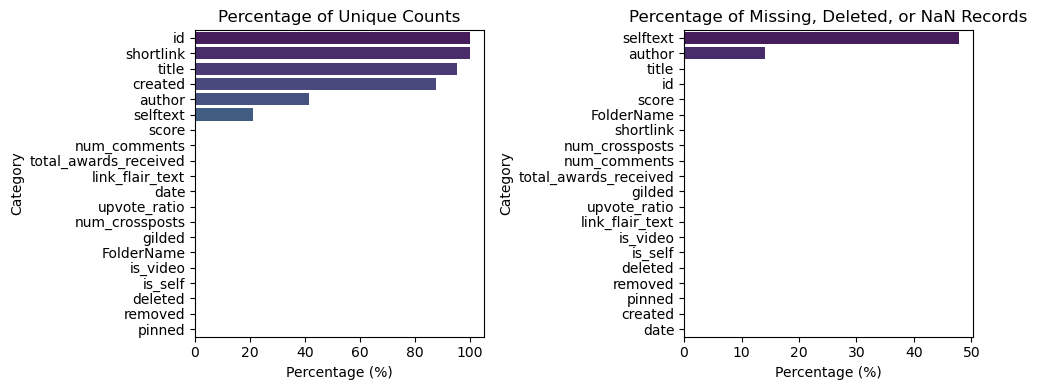

In [40]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1: Percentage of Unique Counts for Each Categorical Value
unique_counts = df.nunique()
percentage_unique = (unique_counts / len(df)) * 100
percentage_unique = percentage_unique.sort_values(ascending=False)
sns.barplot(ax=axes[0], x=percentage_unique.values, y=percentage_unique.index, palette="viridis")
axes[0].set_title("Percentage of Unique Counts")
axes[0].set_xlabel("Percentage (%)")
axes[0].set_ylabel("Category")

# Plot 2: Percentage of Missing, Deleted, or NaN Records
missing_deleted_nan = df.isin(["[removed]", "[deleted]", "NaN"]).sum() / len(df) * 100
missing_deleted_nan = missing_deleted_nan.sort_values(ascending=False)
sns.barplot(ax=axes[1], x=missing_deleted_nan.values, y=missing_deleted_nan.index, palette="viridis")
axes[1].set_title("Percentage of Missing, Deleted, or NaN Records")
axes[1].set_xlabel("Percentage (%)")
axes[1].set_ylabel("Category")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Selftext is a problem here, as only 20% of our rows contain unique text (297k rows, as calculated below). 

In [41]:
# Lets look at the number of unique values in our object columns
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name, unique_values=unique_values))

Feature 'id' has '1416936' unique values
Feature 'author' has '584771' unique values
Feature 'created' has '1243020' unique values
Feature 'pinned' has '1' unique values
Feature 'removed' has '2' unique values
Feature 'deleted' has '2' unique values
Feature 'is_self' has '2' unique values
Feature 'is_video' has '2' unique values
Feature 'title' has '1350669' unique values
Feature 'link_flair_text' has '370' unique values
Feature 'upvote_ratio' has '101' unique values
Feature 'score' has '7354' unique values
Feature 'gilded' has '43' unique values
Feature 'total_awards_received' has '530' unique values
Feature 'num_comments' has '2487' unique values
Feature 'num_crossposts' has '58' unique values
Feature 'selftext' has '297903' unique values
Feature 'shortlink' has '1416936' unique values
Feature 'FolderName' has '14' unique values
Feature 'date' has '365' unique values


Let's look at the authors with the highest score:

In [42]:
df.sort_values(by='score').tail(5).T

,704,162,152,126,226
id,l881ia,l6x130,l846a1,l78uct,l6wu59
author,keenfeed,does-it-mater,DeepFuckingValue,DeepFuckingValue,vrweensy
created,2021-01-29 23:40:59,2021-01-28 13:49:11,2021-01-29 21:04:45,2021-01-28 21:06:23,2021-01-28 13:40:34
pinned,0,0,0,0,0
removed,0,0,0,0,0
deleted,0,0,0,0,0
is_self,0,1,0,0,0
is_video,0,0,0,0,0
title,It’s treason then,"CLASS ACTION AGAINST ROBINHOOD. Allowing people to only sell is the definition of market manipulation. A class action must be started, Robinhood has made plenty of money off selling info about our trades to the hedge funds to be able to pay out a little for causing people to loose money now",GME YOLO month-end update — Jan 2021,GME YOLO update — Jan 28 2021,UPVOTE so everyone sees we got SUPPORT
link_flair_text,Meme,Discussion,YOLO,YOLO,News


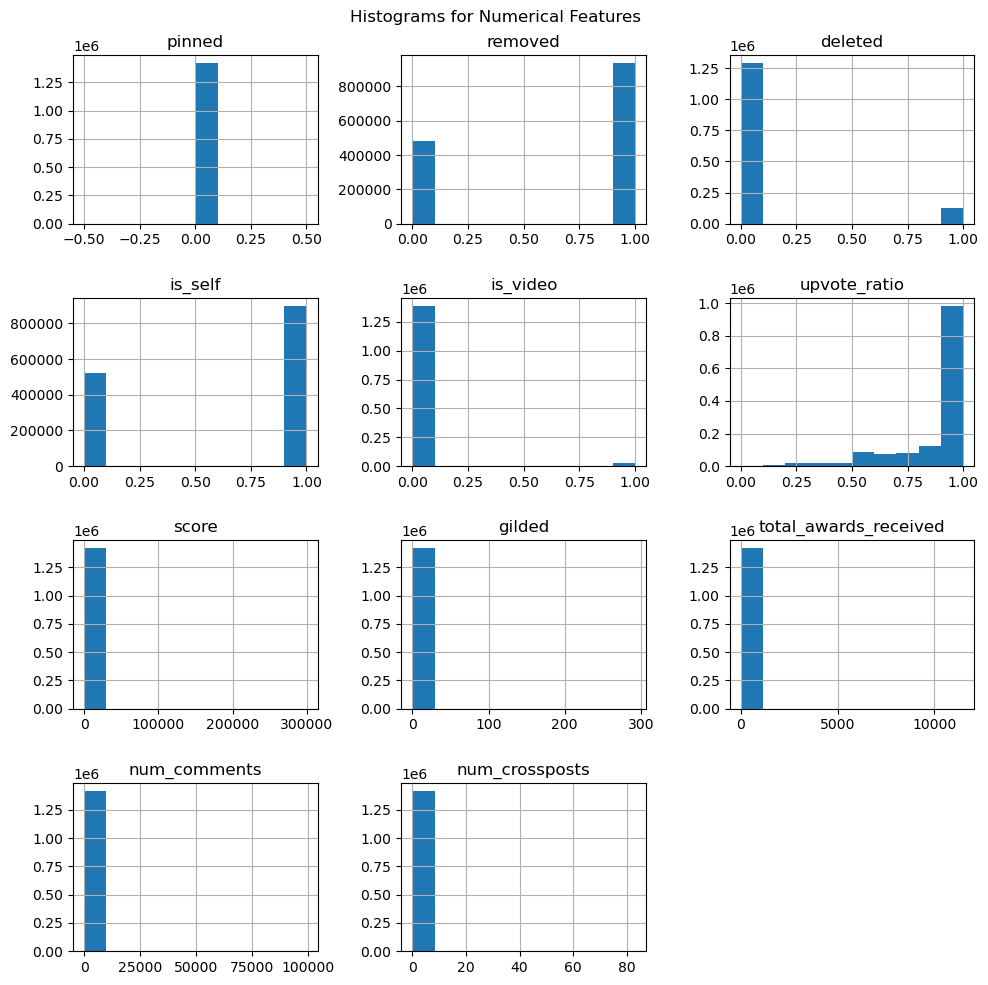

In [44]:
# Histograms for all numerical features:

df.select_dtypes(include=['int64', 'float64']).hist(figsize=(10,10))
plt.suptitle("Histograms for Numerical Features") 
# the suptitle places a centralized title above all the subplots. 
plt.tight_layout()
plt.show()

Let's look at all those messages that have been removed by the moderators.  They have 1 in the column 'removed'.

In [48]:
removed= df['removed'].value_counts()
df['removed'].value_counts()

removed
1    934739
0    482197
Name: count, dtype: int64

A huge percentage of the original posts (934k!) have been removed by the moderators = 62% of the starting total or an incredible 0.9m posts!  Let's look closer at the removed posts.  Maybe there was a good reason why they have been removed? 

so, >70% of rows flagged as 'removed' have no values for 'selftext', a field that we need for our textual analysis. Let's have a look at what kind of text we have in the rows that have non-null values:  

In [53]:
# Filter out rows based on the conditions - 
temp_df = df[(df['removed'] != 1) & (~df['selftext'].isin(["[removed]", "[deleted]", "NaN"]))]

# Reset the index of the filtered DataFrame
temp_df.reset_index(drop=True, inplace=True)

temp_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482156 entries, 0 to 482155
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     482156 non-null  object        
 1   author                 482156 non-null  object        
 2   created                482156 non-null  datetime64[ns]
 3   pinned                 482156 non-null  int64         
 4   removed                482156 non-null  int64         
 5   deleted                482156 non-null  int64         
 6   is_self                482156 non-null  int64         
 7   is_video               482156 non-null  int64         
 8   title                  482156 non-null  object        
 9   link_flair_text        430552 non-null  object        
 10  upvote_ratio           482156 non-null  float64       
 11  score                  482156 non-null  int64         
 12  gilded                 482156 non-null  int6

1,008K rows have been tagged as "removed" by moderators. This is a stunning 2/3 of our dataset.  Around 75% of such 'removed" rows have no selftext.   

Only 310k of such "removed" rows have self text in them, so they present an interest to us. It is quite likely that the quality of comments in such rows was low, spamming the air.  Some of the records I manually reviewed talk about unrelated issues (such as student debt troubles, property transactions, venting out emotions, etc.) and it is understandable that moderators chose to remove such posts.  However, these rows also include some relevant comments on the market. <br> <br>I decided to keep the rows tagged 'removed' . 

----
## 4. EDA

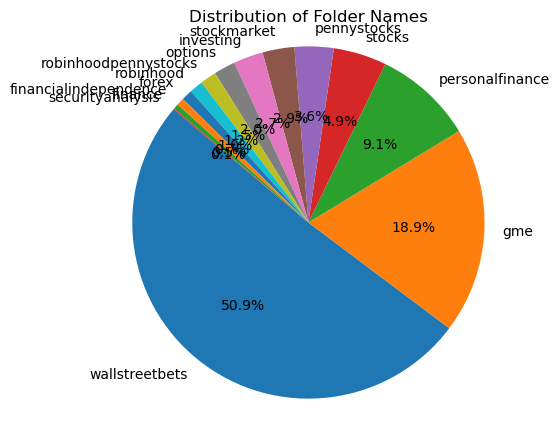

In [54]:
# Create a chart with distribution of rows by subreddits in a shape of a pie chart

# Calculate the value counts for 'FolderName' column
folder_counts = df['FolderName'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(folder_counts, labels=folder_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Folder Names')
plt.show()

### Group by Date

In [55]:
# Group by the 'Date' column and aggregate columns
df_agg_by_date = df.groupby([df['created'].dt.date]).agg({
    'id':'count', 
    'score': 'mean',
    'num_comments':'sum'
}).reset_index().rename(columns={
    'id': 'total_count',
    'score': 'average_score',
    'num_comments': 'total_comments'
})

In [56]:
df_agg_by_date.head(3)

,created,total_count,average_score,total_comments
0,2021-01-01,1024,80.109375,48557
1,2021-01-02,1163,91.071367,19973
2,2021-01-03,1048,118.337786,33696


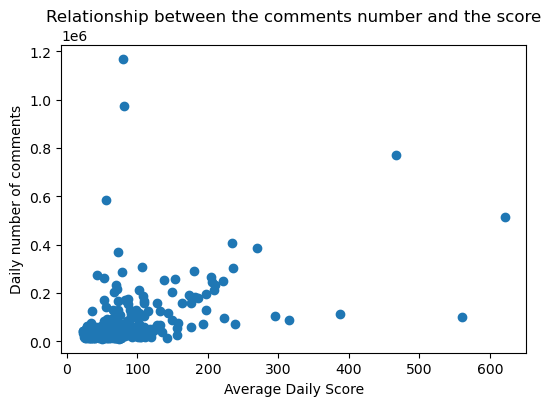

In [ ]:
# scatterplot
plt.figure()
plt.scatter(df_agg_by_date['average_score'], df_agg_by_date['total_comments'])
plt.title('Relationship between the comments number and the score')
plt.xlabel('Average Daily Score')
plt.ylabel('Daily number of comments')
plt.show()

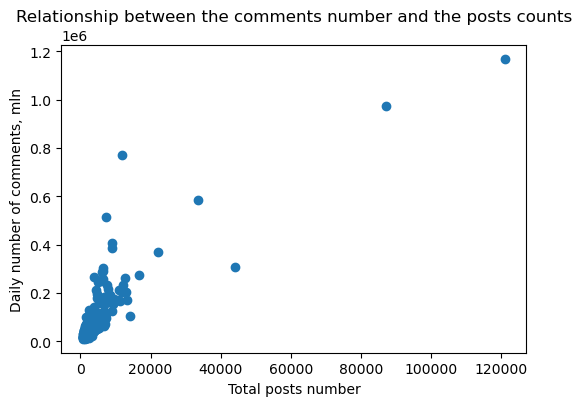

In [57]:
# scatterplot  - group BY DATE
plt.figure()
plt.scatter(df_agg_by_date['total_count'], df_agg_by_date['total_comments'])
plt.title('Relationship between the comments number and the posts counts')
plt.xlabel('Total posts number')
plt.ylabel('Daily number of comments, mln')
plt.show()

### History of postings in 2021

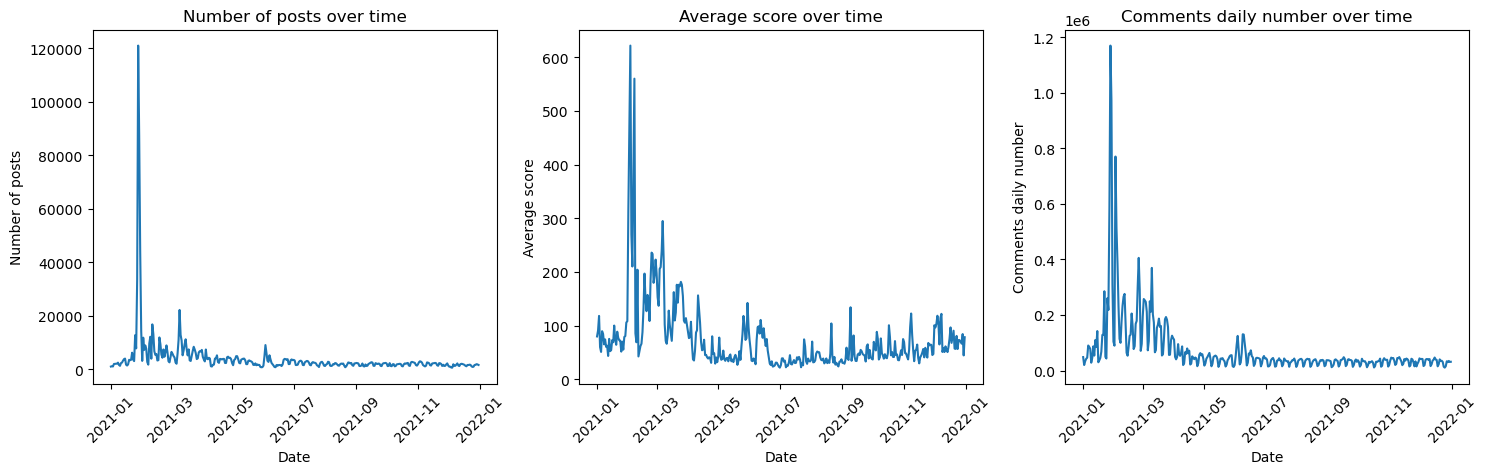

In [58]:
# Create a figure and a 1x3 subplot layout. ax is a list of AxesSubplots.
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(df_agg_by_date['created'], df_agg_by_date['total_count'])
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Number of posts')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('Number of posts over time')

ax[1].plot(df_agg_by_date['created'], df_agg_by_date['average_score'])
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Average score')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('Average score over time')

ax[2].plot(df_agg_by_date['created'], df_agg_by_date['total_comments'])
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Comments daily number')
ax[2].tick_params(axis='x', rotation=45)
ax[2].set_title('Comments daily number over time')

plt.tight_layout()
plt.show()


In [59]:
# Sort df_agg_by_date by 'created' in ascending order
df_agg_by_date_sorted = df_agg_by_date.sort_values(by='created', ascending=True)

# Select the top 20 dates with the highest number of posts
top_20_dates_df = df_agg_by_date_sorted.nlargest(20, 'total_count')

# Create a new DataFrame with 'created', 'total_count', and 'total_comments' columns
top_20_dates_df = top_20_dates_df[['created', 'total_count', 'total_comments']]

# Reset the index of the new DataFrame
top_20_dates_df.reset_index(drop=True, inplace=True)

# Sort the top_20_dates_df by 'created' in ascending order
top_20_dates_df_sorted = top_20_dates_df.sort_values(by='created', ascending=True)

# Display the top 20 dates DataFrame ordered by 'created'
print("Top 20 Dates with the Highest Number of Posts (Ordered by Date):")
top_20_dates_df_sorted


Top 20 Dates with the Highest Number of Posts (Ordered by Date):


,created,total_count,total_comments
9,2021-01-25,12759,260659
3,2021-01-27,33649,586929
0,2021-01-28,121079,1170079
1,2021-01-29,87139,972485
2,2021-01-30,44084,309345
6,2021-01-31,14274,103890
12,2021-02-02,11827,770629
16,2021-02-08,9647,176070
10,2021-02-09,12159,233404
5,2021-02-11,16798,276091


In [64]:
total_count_sum = top_20_dates_df['total_count'].sum()
total_count_percentage = (top_20_dates_df['total_count'].sum() / len(df)) * 100
print(f'Total count of posts on 20 most active days is {total_count_sum} which is {total_count_percentage} percent of the total rows. The period between 25 Jan and 15 March 2021 was the busiest.')

Total count of posts on 20 most active days is 484521 which is 34.19498128355832 percent of the total rows. The period between 25 Jan and 15 March 2021 was the busiest.


### Distribution of posts by month in 2021

<Axes: xlabel='created'>

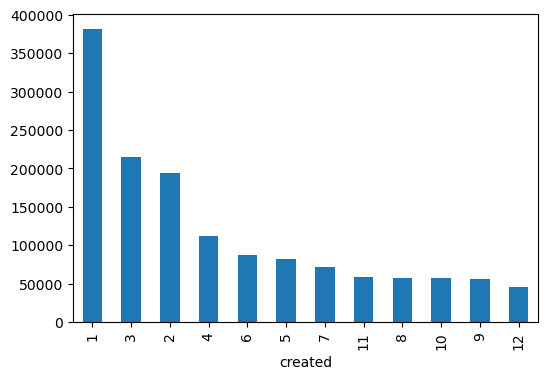

In [65]:
# Plot of post counts grouped by MONTH
df['created'].dt.month.value_counts().plot(kind='bar', figsize=(6,4))

### Group by author

In [66]:
# Group by the 'Date' column and aggregate columns
df_agg_by_author = df.groupby([df['author']]).agg({
    'id':'count', 
    'score': 'mean',
    'num_comments':'sum',
    'total_awards_received':'sum',
    'num_crossposts':'sum',
    'deleted':'sum',
    'removed':'sum',
    'upvote_ratio':'sum',
    'title':'count',
    'selftext':'count'
}).reset_index().rename(columns={
    'id': 'total_count',
    'score': 'average_score',
    'num_comments': 'sum_comments',
    'total_awards_received': 'sum_awards', 
    'num_crossposts': 'sum_crossposts',
    'deleted':'sum_deleted',
    'removed':'sum_removed',
    'upvote_ratio':'sum_upvoted',
    'selftext':'count_selftext'
})

In [73]:
# Creating a new field which measures an average number of comments per one post
df_agg_by_author['com_per_post']=df_agg_by_author['sum_comments']/ df_agg_by_author['total_count']

# Creating a new df with top authors only, as they are the main subject of my analysis 
# Sorting the filtering results by the NUMBER OF COMMENTS
df_top_authors= df_agg_by_author.sort_values(by="sum_comments", ascending=False).head(100)
df_top_authors.head(15)

,author,total_count,average_score,sum_comments,sum_awards,sum_crossposts,sum_deleted,sum_removed,sum_upvoted,title,count_selftext,com_per_post
226381,OPINION_IS_UNPOPULAR,581,2654.905336,7532139,31665,267,0,5,512.57,581,581,12964.094664
30463,AutoModerator,1906,79.013641,2078730,3401,41,0,9,1618.20,1906,1906,1090.624344
357199,[deleted],200001,19.274669,867328,19075,1393,129375,199456,179641.36,200001,200001,4.336618
434187,grebfar,8,14608.500000,432083,1303,19,0,0,6.88,8,8,54010.375000
207805,MotorizedDoucheCanoe,14,12865.428571,420556,2079,21,0,0,12.93,14,14,30039.714286
571423,wallstreetboyfriend,4,37106.500000,167170,1750,16,0,0,3.83,4,4,41792.500000
127388,GoBeaversOSU,7,2278.142857,149694,417,4,0,0,5.83,7,7,21384.857143
339987,VisualMod,157,178.885350,147040,441,18,0,3,125.69,157,157,936.560510
81995,DeepFuckingValue,17,106921.294118,141340,61723,340,0,0,15.74,17,17,8314.117647
583953,zjz,12,3713.833333,137665,876,6,0,2,10.76,12,12,11472.083333


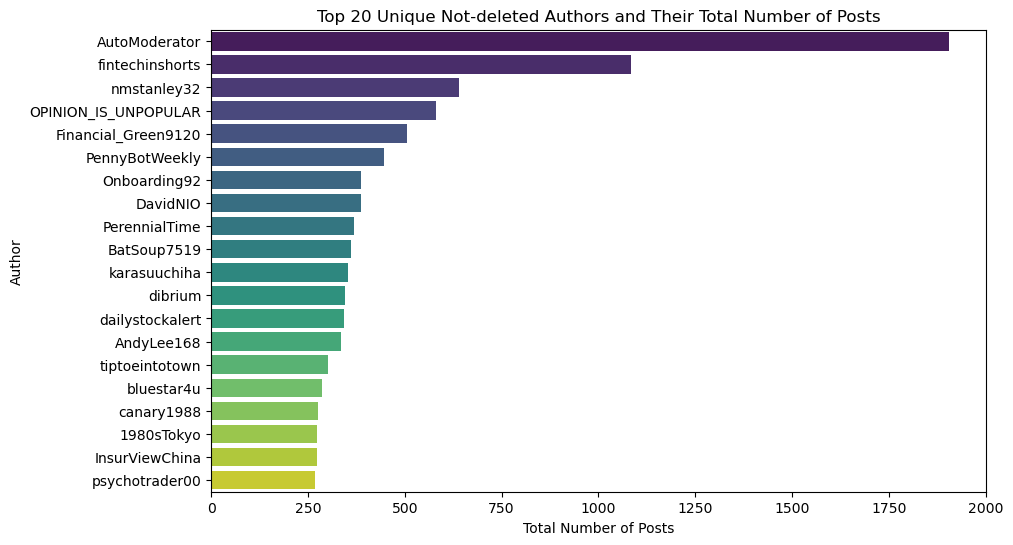

In [69]:
# Calculate the number of posts per author
author_counts = df['author'].value_counts()

# Exclude the count for author "[deleted]"
author_counts = author_counts.drop("[deleted]", errors='ignore')

# Get the top 20 authors and their post counts
top_20_authors = author_counts.head(20)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_authors.values, y=top_20_authors.index, palette="viridis")
plt.title("Top 20 Unique Not-deleted Authors and Their Total Number of Posts")
plt.xlabel("Total Number of Posts")
plt.ylabel("Author")
plt.show()


The average number of posts for the most active accounts should be enough to calculate their performance as "financial advisors".

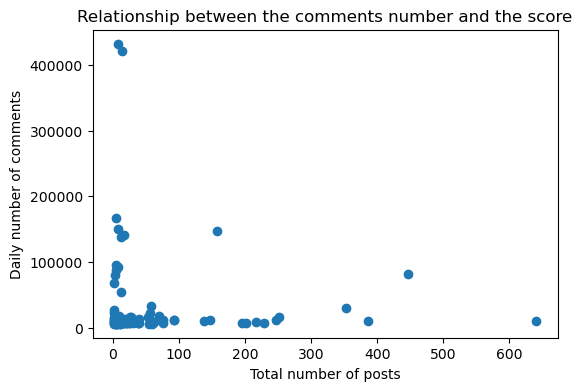

In [ ]:
# Exclude top 3 outliers authors from the DataFrame - deleted posts, and two most active moderators who posted a lot
excluded_authors = ['OPINION_IS_UNPOPULAR', '[deleted]', 'AutoModerator']
df_filtered = df_top_authors[~df_top_authors['author'].isin(excluded_authors)]

# Scatterplot for the filtered DataFrame
plt.figure()
plt.scatter(df_filtered['total_count'], df_filtered['sum_comments'])
plt.title('Relationship between the comments number and the score')
plt.xlabel('Total number of posts')
plt.ylabel('Daily number of comments')
plt.show()

no relationship, really

let's look at the top 10 accounts by impact (number of comments received per post)

In [72]:
# Exclude top 3 outliers authors from the DataFrame - deleted posts, and two most active moderators
excluded_authors = ['OPINION_IS_UNPOPULAR', '[deleted]', 'AutoModerator']
df_filtered = df_top_authors #[~df_top_authors['author'].isin(excluded_authors)]

# Convert "comments_per_author" to integers
df_filtered['com_per_post'] = df_filtered['com_per_post'].astype(int)

# Sort the DataFrame by "comments_per_author" in descending order
df_filtered_sorted = df_filtered.sort_values(by='com_per_post', ascending=False)

# df_filtered_sorted.head()

# Print the summary of top accounts ranked from highest to lowest "comments_per_post"
print("Top Accounts Ranked by Comments Per Post:")
print(df_filtered_sorted[['author', 'com_per_post']].head(20))


Top Accounts Ranked by Comments Per Post:
                      author  com_per_post
513944              premier_         67871
434187               grebfar         54010
571423   wallstreetboyfriend         41792
207805  MotorizedDoucheCanoe         30039
484241                mcuban         27424
556526        theycallmeryan         26904
127388          GoBeaversOSU         21384
77925           Dan_inKuwait         19204
144552    ITradeBaconFutures         17427
303524                Stylux         13092
226381  OPINION_IS_UNPOPULAR         12964
583953                   zjz         11472
284502              Shrubber         11242
81995       DeepFuckingValue          8314
76145              DNXPeeJay          7448
124083              Geko2012          7428
9144                   AOCnp          6398
493957               mwybert          5295
473740    liftingtailsofcats          4887
445396    idontevenlikedinos          4869


The top authors received 5-68 thousand comments per post! 

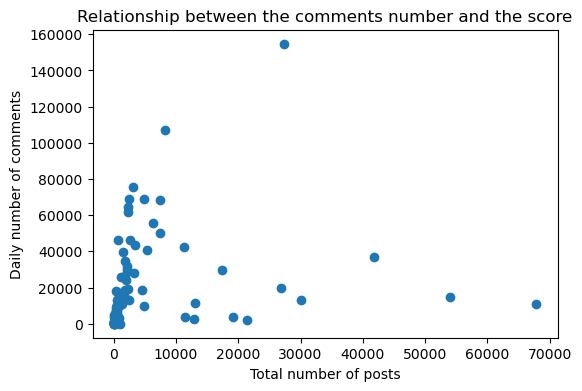

In [75]:
# Filtering out rows where 'author' is any of these values: '[deleted]', 'OPINION_IS_UNPOPULAR', 'AutoModerator'
df_top_authors_no_outliers = df_top_authors[~df_top_authors['author'].isin(['[deleted]', 'OPINION_IS_UNPOPULAR', 'AutoModerator'])]

# scatterplot
plt.figure()
plt.scatter(df_top_authors['com_per_post'], df_top_authors['average_score'])
plt.title('Relationship between the comments number and the score')
plt.xlabel('Total number of posts')
plt.ylabel('Daily number of comments')
plt.show()

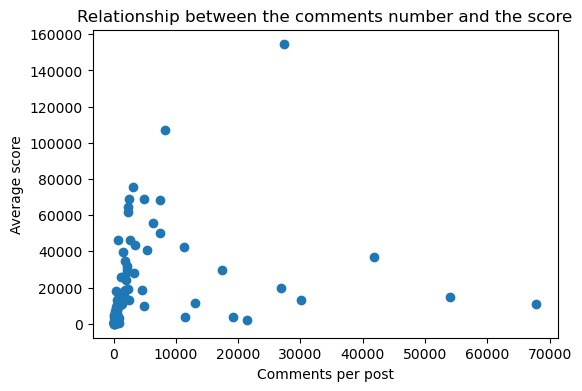

In [76]:
# Exclude top 3 outliers authors from the DataFrame - deleted posts, and two most active moderators who posted a lot
excluded_authors = ['OPINION_IS_UNPOPULAR', '[deleted]', 'AutoModerator']
df_filtered = df_top_authors[~df_top_authors['author'].isin(excluded_authors)]

# Scatterplot for the filtered DataFrame
plt.figure()
plt.scatter(df_filtered['com_per_post'], df_filtered['average_score'])
plt.title('Relationship between the comments number and the score')
plt.xlabel('Comments per post')
plt.ylabel('Average score')
plt.show()

Observations: 

Account named OPINION_IS_UNPOPULAR has been one of the most prominent cheerleaders of the WSB subreddit. On the scatterplot above that account is a distant outlier being #1  both in terms of the number of posts (630) and the number of comments received (7.5mln)). 

We can see that there is no correlation between the number of posts and the number of comments received. There were two other accounts that received an enormous number of comments (>400k each), even though they were not the most prolofic posters. Perhaps their posts were very impressive and incited a lot of emotions. 

This group of the authors that generated the most of the comments should be carefully examined as they were probably the most influential ones.

In [77]:
# Step 1: Calculate threshold for top 0.1% of 'num_comments' and 'id' count in df_top_authors
threshold_num_comments = df_top_authors['sum_comments'].quantile(0.5)
threshold_id_count = df_top_authors['total_count'].quantile(0.5)

In [78]:
# Step 3: Select rows that meet either the top 1% threshold for 'num_comments' or 'id' count
selected_rows = df_top_authors[(df_top_authors['sum_comments'] >= threshold_num_comments) | (df_top_authors['total_count'] >= threshold_id_count)]

# Select rows that meet either the top 0.1% threshold for 'num_comments' or 'id' count.
selected_rows=selected_rows.sort_values(by=['sum_comments'], ascending=False)

In [79]:
selected_rows.head(15)


,author,total_count,average_score,sum_comments,sum_awards,sum_crossposts,sum_deleted,sum_removed,sum_upvoted,title,count_selftext,com_per_post
226381,OPINION_IS_UNPOPULAR,581,2654.905336,7532139,31665,267,0,5,512.57,581,581,12964.094664
30463,AutoModerator,1906,79.013641,2078730,3401,41,0,9,1618.20,1906,1906,1090.624344
357199,[deleted],200001,19.274669,867328,19075,1393,129375,199456,179641.36,200001,200001,4.336618
434187,grebfar,8,14608.500000,432083,1303,19,0,0,6.88,8,8,54010.375000
207805,MotorizedDoucheCanoe,14,12865.428571,420556,2079,21,0,0,12.93,14,14,30039.714286
571423,wallstreetboyfriend,4,37106.500000,167170,1750,16,0,0,3.83,4,4,41792.500000
127388,GoBeaversOSU,7,2278.142857,149694,417,4,0,0,5.83,7,7,21384.857143
339987,VisualMod,157,178.885350,147040,441,18,0,3,125.69,157,157,936.560510
81995,DeepFuckingValue,17,106921.294118,141340,61723,340,0,0,15.74,17,17,8314.117647
583953,zjz,12,3713.833333,137665,876,6,0,2,10.76,12,12,11472.083333


In [80]:
selected_rows.shape

(73, 12)

In [82]:
# a hedge fund manager who posted deep dives, started posting in 2020. Published insiightful posts. 
df_agg_by_author[df_agg_by_author['author'] == 'Robertf1032010']

,author,total_count,average_score,sum_comments,sum_awards,sum_crossposts,sum_deleted,sum_removed,sum_upvoted,title,count_selftext,com_per_post
268559,Robertf1032010,2,4374.0,1332,79,4,0,0,1.77,2,2,666.0


In [81]:
# Just an average poster - 2 posts, not much following 
df_agg_by_author[df_agg_by_author['author'] == 'sadshark']

,author,total_count,average_score,sum_comments,sum_awards,sum_crossposts,sum_deleted,sum_removed,sum_upvoted,title,count_selftext,com_per_post
527682,sadshark,5,10.2,185,1,0,0,3,3.64,5,5,37.0


## 5. Conclusion

To conclude this notebook, it involves data collection, cleaning and some preliminary exploration of dataset by going through EDA techniques in order to understand the data and plot meaningful insights. 

In my next notebook, I will be cleaning the text data to prepare it for text processing my machines.